In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

# Lectura de datos

In [2]:
with open('ISCX.json', 'r') as file:
    ISCX_data = json.load(file)
df_ISCX = pd.DataFrame(data=ISCX_data['dataroot']['TestbedSunJun13Flows'])

df_UNSW = pd.read_csv('UNSW.csv', names=np.arange(1,50), skiprows=1)

In [3]:
df_ISCX.head()

,Tag,appName,destination,destinationPayloadAsBase64,destinationPayloadAsUTF,destinationPort,destinationTCPFlagsDescription,direction,protocolName,source,sourcePayloadAsBase64,sourcePayloadAsUTF,sourcePort,sourceTCPFlagsDescription,startDateTime,stopDateTime,totalDestinationBytes,totalDestinationPackets,totalSourceBytes,totalSourcePackets
0,Normal,Unknown_UDP,224.0.0.251,None,None,5353,N/A,L2R,udp_ip,192.168.5.122,None,None,5353,N/A,2010-06-12T23:57:24,2010-06-13T09:24:52,0,0,2633658,28971
1,Normal,Unknown_UDP,224.0.0.251,None,None,5353,N/A,L2R,udp_ip,192.168.5.122,None,None,5353,N/A,2010-06-12T23:57:24,2010-06-13T09:24:52,0,0,2633658,28971
2,Normal,HTTPWeb,192.168.5.122,None,None,80,R,L2L,tcp_ip,192.168.2.113,None,None,4191,"F,A",2010-06-12T23:57:38,2010-06-12T23:59:20,128,2,64,1
3,Normal,HTTPWeb,192.168.5.122,None,None,80,R,L2L,tcp_ip,192.168.2.113,None,None,4191,"F,A",2010-06-12T23:57:38,2010-06-12T23:59:20,128,2,64,1
4,Normal,HTTPWeb,207.241.148.80,None,None,80,"F,A",L2R,tcp_ip,192.168.2.113,None,None,4192,"F,A",2010-06-12T23:57:40,2010-06-12T23:59:20,64,1,128,2


In [4]:
print('ISCX columnas: ', df_ISCX.columns.values)
print('ISCX tags: ', df_ISCX['Tag'].unique())

ISCX columnas:  ['Tag' 'appName' 'destination' 'destinationPayloadAsBase64'
 'destinationPayloadAsUTF' 'destinationPort'
 'destinationTCPFlagsDescription' 'direction' 'protocolName' 'source'
 'sourcePayloadAsBase64' 'sourcePayloadAsUTF' 'sourcePort'
 'sourceTCPFlagsDescription' 'startDateTime' 'stopDateTime'
 'totalDestinationBytes' 'totalDestinationPackets' 'totalSourceBytes'
 'totalSourcePackets']
ISCX tags:  ['Normal' 'Attack']


In [5]:
df_UNSW.head()

,1,2,3,4,5,6,7,8,9,10,...,40,41,42,43,44,45,46,47,48,49
0,59.166.0.9,7045,149.171.126.7,25,tcp,FIN,0.201886,37552,3380,31,...,,2,2,7,4,1,1,3,NaN,0
1,59.166.0.9,9685,149.171.126.2,80,tcp,FIN,5.864748,19410,1087890,31,...,,3,1,4,4,1,1,1,NaN,0
2,59.166.0.2,1421,149.171.126.4,53,udp,CON,0.001391,146,178,31,...,,3,5,2,7,1,1,4,NaN,0
3,59.166.0.2,21553,149.171.126.2,25,tcp,FIN,0.053948,37812,3380,31,...,,1,1,4,7,1,1,3,NaN,0
4,59.166.0.8,45212,149.171.126.4,53,udp,CON,0.000953,146,178,31,...,,2,5,2,1,1,1,2,NaN,0


In [6]:
print('UNSW columnas: ', df_UNSW.columns.values)
print('UNSW tags: ', df_UNSW[49].unique())

UNSW columnas:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
UNSW tags:  [0 1]


# Tratamiento de los datos

**Transformamos en valores numéricos las dos posibles categorías: Normal -> 0 y Attack -> 1.**

In [7]:
df_ISCX = df_ISCX[['source', 'destination', 'Tag']]
df_ISCX.loc[:, 'Tag'].replace(['Normal'], 0, inplace=True)
df_ISCX.loc[:, 'Tag'].replace(['Attack'], 1, inplace=True)

df_ISCX.head()

,source,destination,Tag
0,192.168.5.122,224.0.0.251,0
1,192.168.5.122,224.0.0.251,0
2,192.168.2.113,192.168.5.122,0
3,192.168.2.113,192.168.5.122,0
4,192.168.2.113,207.241.148.80,0


In [8]:
df_UNSW = df_UNSW[[1, 3, 49]]
df_UNSW.columns = ['source', 'destination', 'Tag']

df_UNSW.head()

,source,destination,Tag
0,59.166.0.9,149.171.126.7,0
1,59.166.0.9,149.171.126.2,0
2,59.166.0.2,149.171.126.4,0
3,59.166.0.2,149.171.126.2,0
4,59.166.0.8,149.171.126.4,0


In [9]:
df_ISCX['src-dst'] = df_ISCX.apply(lambda x: x['source'] + x['destination'], axis=1, result_type='expand')
df_UNSW['src-dst'] = df_UNSW.apply(lambda x: x['source'] + x['destination'], axis=1, result_type='expand')

# Porcentajes Normal y Attack

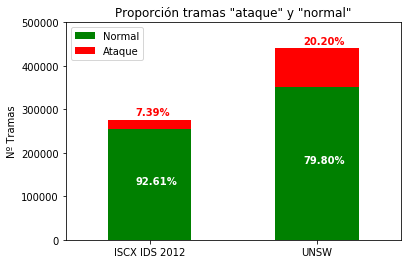

In [22]:
N = 2
normal = (
    df_ISCX[df_ISCX['Tag'] == 0].shape[0],
    df_UNSW[df_UNSW['Tag'] == 0].shape[0]
)

attack = (
    df_ISCX[df_ISCX['Tag'] == 1].shape[0],
    df_UNSW[df_UNSW['Tag'] == 1].shape[0],
)

ind = [0, 0.3]    
width = 0.15       

p1 = plt.bar(ind, normal, width, color='green')
p2 = plt.bar(ind, attack, width, color='red',
             bottom=normal)

plt.ylabel('Nº Tramas')
plt.title('Proporción tramas "ataque" y "normal"')
plt.xticks(ind, ('ISCX IDS 2012', 'UNSW'))
plt.axis([-0.15,0.45,0,500000]) 
plt.legend((p1[0], p2[0]), ('Normal', 'Ataque'))


total = (
    df_ISCX.shape[0],
    df_UNSW.shape[0],    
)

for i in range(N):
    plt.text(ind[i] - 0.025, normal[i]/2, "{0:.2f}".format(normal[i]/total[i]*100) + '%', color='white', fontweight='bold')
    plt.text(ind[i] - 0.025, normal[i] + attack[i] + 10000, "{0:.2f}".format(attack[i]/total[i]*100) + '%', color='red', fontweight='bold')

plt.show()

# Calidad de los datos

In [37]:
print('Nº IP origen distintas respecto al total:')
print('ISCX:\t' + str(df_ISCX['source'].unique().size) + '/' + str(df_ISCX.shape[0]))
print('UNSW:\t' + str(df_UNSW['source'].unique().size) + '/' + str(df_UNSW.shape[0]))

Nº IP origen distintas respecto al total:
ISCX:	44/275528
UNSW:	38/440044


In [39]:
print('Nº IP destino distintas respecto al total:')
print('ISCX:\t' + str(df_ISCX['destination'].unique().size) + '/' + str(df_ISCX.shape[0]))
print('UNSW:\t' + str(df_UNSW['destination'].unique().size) + '/' + str(df_UNSW.shape[0]))

Nº IP destino distintas respecto al total:
ISCX:	2645/275528
UNSW:	43/440044


In [40]:
print('Nº parejas IP origen-destino distintas respecto el total:')
print('ISCX:\t' + str(df_ISCX['src-dst'].unique().size) + '/' + str(df_ISCX.shape[0]))
print('UNSW:\t' + str(df_UNSW['src-dst'].unique().size) + '/' + str(df_UNSW.shape[0]))

Nº parejas IP origen-destino distintas respecto el total:
ISCX:	4986/275528
UNSW:	201/440044


# ¿Indican inequívocamente las IPs el tipo de trama?

In [47]:
df_ISCX_src = df_ISCX.groupby(['source']).agg({'Tag': pd.Series.nunique}) 
df_ISCX_dst = df_ISCX.groupby(['destination']).agg({'Tag': pd.Series.nunique}) 
df_ISCX_src_dst = df_ISCX.groupby(['src-dst']).agg({'Tag': pd.Series.nunique}) 

print('(ISCX) Porcentaje IPs origen con un único Tag asociado:\t\t',
    str(df_ISCX_src[df_ISCX_src['Tag']==1].shape[0]/df_ISCX['source'].unique().size*100) + ' %')
print('(ISCX) Porcentaje IPs destino con un único Tag asociado:\t',
    str(df_ISCX_dst[df_ISCX_dst['Tag']==1].shape[0]/df_ISCX['destination'].unique().size*100) + ' %')
print('(ISCX) Porcentaje IPs origen-destino con un único Tag asociado: ',
    str(df_ISCX_src_dst[df_ISCX_src_dst['Tag']==1].shape[0]/df_ISCX['src-dst'].unique().size*100) + ' %')

(ISCX) Porcentaje IPs origen con un único Tag asociado:		 61.36363636363637 %
(ISCX) Porcentaje IPs destino con un único Tag asociado:	 98.26086956521739 %
(ISCX) Porcentaje IPs origen-destino con un único Tag asociado:  99.09747292418773 %


In [48]:
df_UNSW_src = df_UNSW.groupby(['source']).agg({'Tag': pd.Series.nunique}) 
df_UNSW_dst = df_UNSW.groupby(['destination']).agg({'Tag': pd.Series.nunique}) 
df_UNSW_src_dst = df_UNSW.groupby(['src-dst']).agg({'Tag': pd.Series.nunique}) 

print('(UNSW) Porcentaje IPs origen con un único Tag asociado:\t\t',
    str(df_UNSW_src[df_UNSW_src['Tag']==1].shape[0]/df_UNSW['source'].unique().size*100) + ' %')
print('(UNSW) Porcentaje IPs destino con un único Tag asociado:\t',
    str(df_UNSW_dst[df_UNSW_dst['Tag']==1].shape[0]/df_UNSW['destination'].unique().size*100) + ' %')
print('(UNSW) Porcentaje IPs origen-destino con un único Tag asociado: ',
    str(df_UNSW_src_dst[df_UNSW_src_dst['Tag']==1].shape[0]/df_UNSW['src-dst'].unique().size*100) + ' %')

(UNSW) Porcentaje IPs origen con un único Tag asociado:		 89.47368421052632 %
(UNSW) Porcentaje IPs destino con un único Tag asociado:	 76.74418604651163 %
(UNSW) Porcentaje IPs origen-destino con un único Tag asociado:  80.09950248756219 %
